# Data  
Kaggle dataset: https://www.kaggle.com/kannanaikkal/food-demand-forecasting

 The data is from a meal delivery service. My goal is to forecast/predict the volume of orders for a region over time, and assess trends in meal requests for that region. This is a timeseries problem.

# Basic Imports

In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [406]:
center = pd.read_csv('./original_data/fulfilment_center_info.csv')
meal = pd.read_csv('./original_data/meal_info.csv')
train = pd.read_csv('./original_data/train.csv.zip')

# MERGING

In [407]:
train.shape

(456548, 9)

In [408]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


#### Merge Center & TT data on 'Center ID'

In [409]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [410]:
center.shape

(77, 5)

In [411]:
train_center = pd.merge(left=train, right=center, how='left', on='center_id')

In [412]:
train_center.shape

(456548, 13)

In [413]:
train_center.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


#### Merge TTC & Meal data on 'Meal ID'

In [414]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [415]:
meal.shape

(51, 3)

In [416]:
df = pd.merge(left=train_center, right=meal, how='left', on='meal_id')

In [417]:
df.shape

(456548, 15)

The DF below is all of the data. Each line is a meal_id (meal type) with num_orders (total # orders) for that week for that meal.

In [418]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


#### Reduce Data to 1 Fullfillment Center

In [419]:
df.groupby('center_id').sum()['num_orders'].sort_values(ascending=False).head()

center_id
13     4296545
43     3920294
10     3381018
52     3125835
137    3117478
Name: num_orders, dtype: int64

Center 13 has the highest volume of orders in the dataset, so I'll focus on this center.

In [420]:
center13 = df[df['center_id']==13]

# EDA & Cleaning

In [421]:
center13.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
194,1171094,1,13,1885,135.86,122.28,0,1,2132,590,56,TYPE_B,6.7,Beverages,Thai
195,1068455,1,13,1993,134.86,122.28,0,1,2418,590,56,TYPE_B,6.7,Beverages,Thai
196,1105491,1,13,2539,133.86,133.86,0,0,474,590,56,TYPE_B,6.7,Beverages,Thai
197,1486384,1,13,2139,337.62,437.53,0,0,123,590,56,TYPE_B,6.7,Beverages,Indian
198,1345938,1,13,2631,252.23,437.47,0,0,162,590,56,TYPE_B,6.7,Beverages,Indian


In [422]:
center13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7046 entries, 194 to 453545
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7046 non-null   int64  
 1   week                   7046 non-null   int64  
 2   center_id              7046 non-null   int64  
 3   meal_id                7046 non-null   int64  
 4   checkout_price         7046 non-null   float64
 5   base_price             7046 non-null   float64
 6   emailer_for_promotion  7046 non-null   int64  
 7   homepage_featured      7046 non-null   int64  
 8   num_orders             7046 non-null   int64  
 9   city_code              7046 non-null   int64  
 10  region_code            7046 non-null   int64  
 11  center_type            7046 non-null   object 
 12  op_area                7046 non-null   float64
 13  category               7046 non-null   object 
 14  cuisine                7046 non-null   object 
dtype

#### Yay, no nulls! Dtypes are what we expect (except for 'week').

#### Need to Drop columns, convert 'week' to DateTime Index, and roll up data by week to forecast volume of orders for Center 13.

In [423]:
# DROPPING COLUMNS

c13_small = center13.drop(columns=['id', 
'center_id', 'city_code', 'region_code', 
'center_type', 'op_area'])

c13_small.head(2)

,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
194,1,1885,135.86,122.28,0,1,2132,Beverages,Thai
195,1,1993,134.86,122.28,0,1,2418,Beverages,Thai


In [424]:
# Converting to DATETIME INDEX...
c13_small['week'] = pd.to_datetime(
    c13_small['week'], 
    unit='W', 
    origin=pd.Timestamp('2019-01-01'))  #RANDOM START DATE
c13_small.set_index('week', inplace=True)
c13_small.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7046 entries, 2019-01-03 to 2021-10-07
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   meal_id                7046 non-null   int64  
 1   checkout_price         7046 non-null   float64
 2   base_price             7046 non-null   float64
 3   emailer_for_promotion  7046 non-null   int64  
 4   homepage_featured      7046 non-null   int64  
 5   num_orders             7046 non-null   int64  
 6   category               7046 non-null   object 
 7   cuisine                7046 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 495.4+ KB


In [425]:
# SORTING & GROUPING DATA BY INDEX
c13_forecast = c13_small.sort_index().groupby(c13_small.index).sum()
c13_forecast.head()

# For groupby, meal_id, category, and cuisine are not useful
# but may be useful to play around with later

,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
week,,,,,,
2019-01-03,88356,14670.51,15888.10,5,6,29531
2019-01-10,88356,14452.35,15914.47,6,9,26903
2019-01-17,88356,14515.25,15931.66,3,6,26938
2019-01-24,88356,14654.35,15941.60,0,7,28707
2019-01-31,86230,13715.09,15132.17,4,11,38183


In [426]:
c13_forecast.drop(columns=['meal_id'], inplace=True)
c13_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2019-01-03 to 2021-10-07
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   checkout_price         145 non-null    float64
 1   base_price             145 non-null    float64
 2   emailer_for_promotion  145 non-null    int64  
 3   homepage_featured      145 non-null    int64  
 4   num_orders             145 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 6.8 KB


#### Since I'm using SKTIME, I need to conver to PeriodTime...

In [427]:
c13_forecast.index = c13_forecast.index.to_period()
c13_forecast.head(3)

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
week,,,,,
2018-12-28/2019-01-03,14670.51,15888.10,5,6,29531
2019-01-04/2019-01-10,14452.35,15914.47,6,9,26903
2019-01-11/2019-01-17,14515.25,15931.66,3,6,26938


In [428]:
c13_forecast.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 145 entries, 2018-12-28/2019-01-03 to 2021-10-01/2021-10-07
Freq: W-THU
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   checkout_price         145 non-null    float64
 1   base_price             145 non-null    float64
 2   emailer_for_promotion  145 non-null    int64  
 3   homepage_featured      145 non-null    int64  
 4   num_orders             145 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 6.8 KB


In [534]:
c13_small_train = c13_small[c13_small.index < '2021-08-13']     # this is test data only!
c13_small_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6638 entries, 2019-01-03 to 2021-08-12
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   meal_id                6638 non-null   int64  
 1   checkout_price         6638 non-null   float64
 2   base_price             6638 non-null   float64
 3   emailer_for_promotion  6638 non-null   int64  
 4   homepage_featured      6638 non-null   int64  
 5   num_orders             6638 non-null   int64  
 6   category               6638 non-null   object 
 7   cuisine                6638 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 466.7+ KB


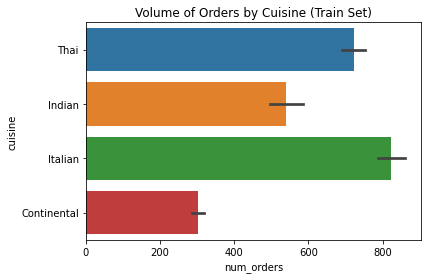

In [545]:
sns.barplot(data=c13_small_train, x="num_orders", y="cuisine")
plt.title("Volume of Orders by Cuisine (Train Set)");

Italian is most popular purchase, followed by thai.

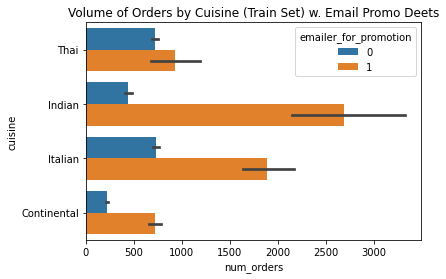

In [546]:
sns.barplot(data=c13_small_train, x="num_orders", y="cuisine", hue="emailer_for_promotion")
plt.title("Volume of Orders by Cuisine (Train Set) w. Email Promo Deets");

The above graph is the same as the prior one, and we can see that the majority of orders were purchased with an email promo.

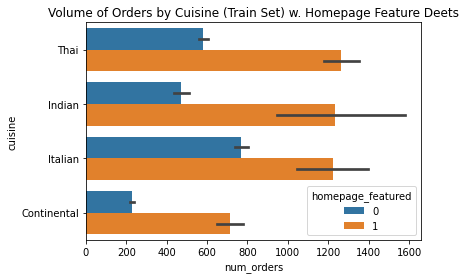

In [547]:
sns.barplot(data=c13_small_train, x="num_orders", y="cuisine", hue="homepage_featured")
plt.title("Volume of Orders by Cuisine (Train Set) w. Homepage Feature Deets");

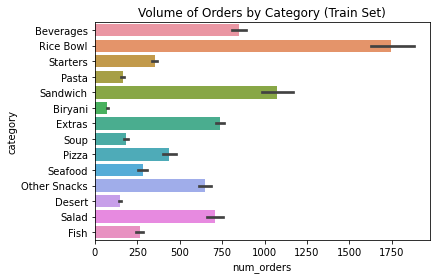

In [541]:
sns.barplot(data=c13_small_train, x="num_orders", y="category")
plt.title("Volume of Orders by Category (Train Set)");

# TTS

In [429]:
from sktime.forecasting.model_selection import temporal_train_test_split
import warnings
warnings.filterwarnings('ignore')

y_train, y_test = temporal_train_test_split(c13_forecast, test_size=8)

In [430]:
y_train.shape, y_test.shape

((137, 5), (8, 5))

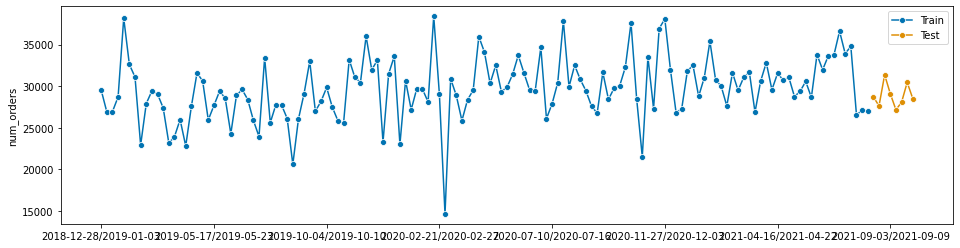

In [431]:
from sktime.utils.plotting import plot_series

plot_series(y_train['num_orders'], y_test['num_orders'], labels=['Train', 'Test']);

# Baseline Models

#### Mean baseline model

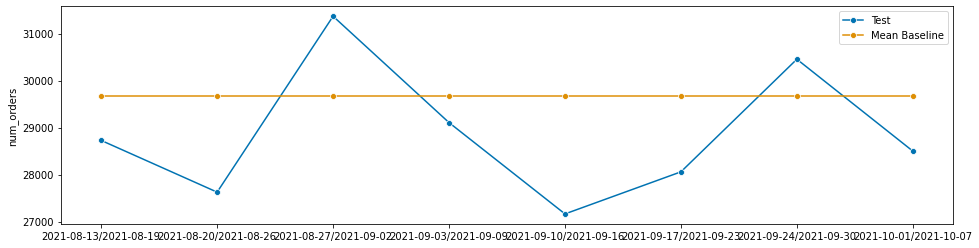

In [432]:
from sktime.forecasting.naive import NaiveForecaster

baseline_mean = NaiveForecaster(strategy='mean', sp=1)
baseline_mean.fit(y_train['num_orders'])
baseline_mean_preds = baseline_mean.predict(y_test['num_orders'].index)

plot_series(
    y_test['num_orders'], 
    baseline_mean_preds, 
    labels=['Test', 'Mean Baseline']);

In [433]:
from sklearn.metrics import mean_squared_error

print('Baseline mean RMSE: ',
    mean_squared_error(y_test['num_orders'], baseline_mean_preds, squared=False))

Baseline mean RMSE:  1549.4630080467173


#### Seasonal/yearly baseline model

In [450]:
baseline_yearly = NaiveForecaster(strategy='last', sp=52)
baseline_yearly.fit(y_train['num_orders'])
baseline_yearly_preds = baseline_yearly.predict(y_test['num_orders'].index)
print('Baseline yearly RMSE: ', 
    mean_squared_error(y_test['num_orders'], baseline_yearly_preds, squared=False))

Baseline yearly RMSE:  2518.6919968507464


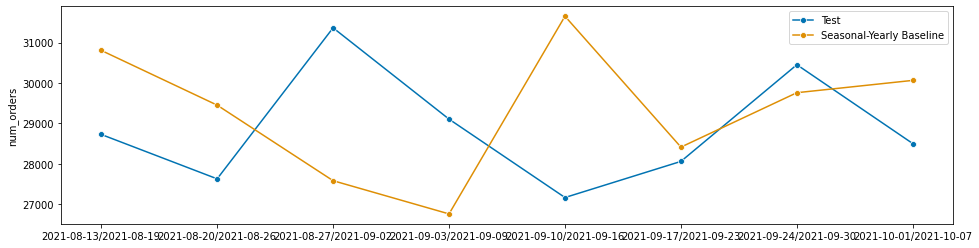

In [451]:
plot_series(
    y_test['num_orders'], 
    baseline_yearly_preds, 
    labels=['Test', 'Seasonal-Yearly Baseline']);

#### Seasonal/Monthly baseline model

In [458]:
baseline_biweekly = NaiveForecaster(strategy='mean', sp=2)
baseline_biweekly.fit(y_train['num_orders'])
baseline_biweekly_preds = baseline_biweekly.predict(y_test['num_orders'].index)
print('Baseline bi-weekly RMSE: ', 
    mean_squared_error(y_test['num_orders'], baseline_biweekly_preds, squared=False))

Baseline bi-weekly RMSE:  1565.1591093673426


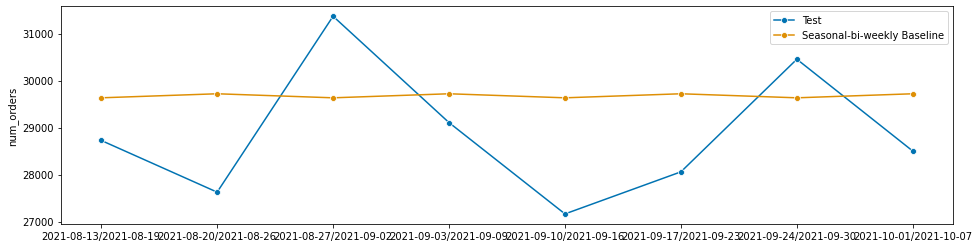

In [459]:
plot_series(
    y_test['num_orders'], 
    baseline_biweekly_preds, 
    labels=['Test', 'Seasonal-bi-weekly Baseline']);

# Modeling

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2690.066, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2674.427, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2688.072, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2661.376, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2658.893, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2661.464, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2656.886, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2659.367, Time=0.02 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2659.276, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2643.535, Time=0

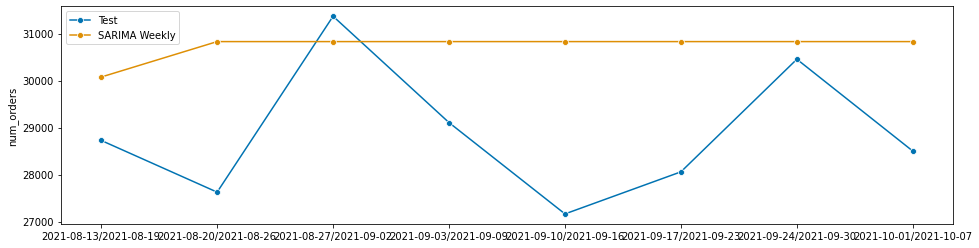

In [484]:
from sktime.forecasting.arima import AutoARIMA

sarima_wkly = AutoARIMA(sp=1, n_jobs=-1, trace=True)
sarima_wkly.fit(y_train['num_orders'])
sarima_wkly_preds = sarima_wkly.predict(y_test['num_orders'].index)

plot_series(
    y_test['num_orders'], 
    sarima_wkly_preds, 
    labels=['Test', 'SARIMA Weekly']);

In [485]:
print('Sarima weekly model RMSE: ', 
    mean_squared_error(y_test['num_orders'], sarima_wkly_preds, squared=False))

Sarima weekly model RMSE:  2291.1179334184217


#### Holt-Winters Model

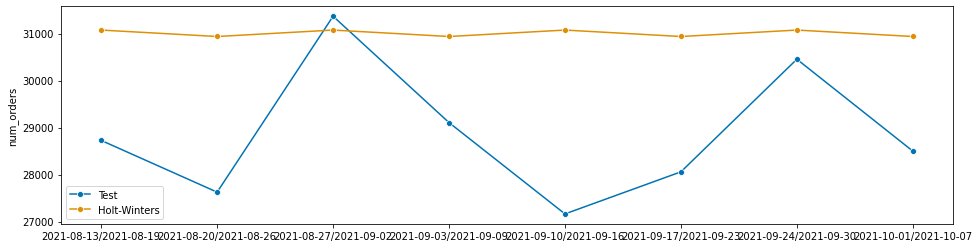

In [489]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw = ExponentialSmoothing(
    y_train['num_orders'],
    trend=None,
    seasonal='mul',     # Multiplicative seasonal trend (bi-weekly)
    seasonal_periods=2
).fit()

hw_biweekly_preds = hw.forecast(len(y_test['num_orders'].index))

plot_series(
    y_test['num_orders'], 
    hw_biweekly_preds, 
    labels=['Test', 'Holt-Winters']);

In [481]:
print('Holt-Winters bi-weekly model RMSE: ', 
    mean_squared_error(y_test['num_orders'], hw_biweekly_preds, squared=False))

Holt-Winters bi-weekly model RMSE:  2495.0532897261846


#### SARIMAX Model - w emailers for promotions

In [496]:
import pmdarima as pmd
sarimax_emailer = pmd.auto_arima(
    y = y_train['num_orders'], 
    X = y_train[['emailer_for_promotion']],
    m=1,
    trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2666.303, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2650.993, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2664.314, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2642.606, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2642.597, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2645.321, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2640.566, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2640.614, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2643.102, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2629.108, Time=0

In [497]:
sarimax_emailer_preds = sarimax_emailer.predict(y_test.shape[0], X=y_test[['emailer_for_promotion']])

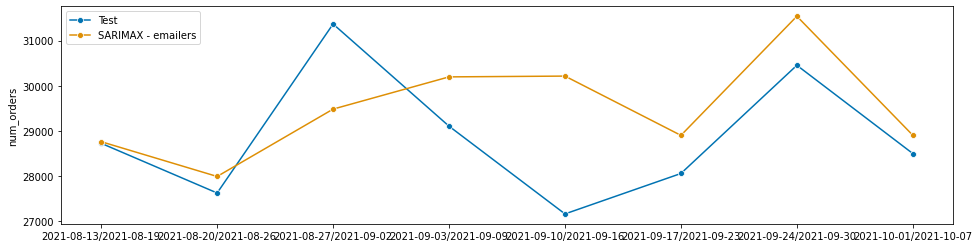

In [502]:
plot_series(
    y_test['num_orders'], 
    pd.DataFrame(sarimax_emailer_preds).set_index(y_test.index), 
    labels=['Test', 'SARIMAX - emailers']);

In [503]:
print('SARIMAX - weekly, emailers model RMSE: ', 
    mean_squared_error(y_test['num_orders'], sarimax_emailer_preds, squared=False))

SARIMAX - weekly, emailers model RMSE:  1424.6752172983524


Yay! This is the best model so far. It's better than the best baseline, which scored RMSE of 1549.  
Best model:  ARIMA(1,1,1)(0,0,0)[0]

#### SARIMAX Model - w homepage featured

In [505]:
import pmdarima as pmd
sarimax_homepage = pmd.auto_arima(
    y = y_train['num_orders'], 
    X = y_train[['homepage_featured']],
    m=1,
    trace=True)

sarimax_homepage_preds = sarimax_homepage.predict(
    y_test.shape[0], X=y_test[['homepage_featured']])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2686.021, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2668.191, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2684.104, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2655.211, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2653.207, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2655.289, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2651.211, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2653.209, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2653.146, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2636.916, Time=0

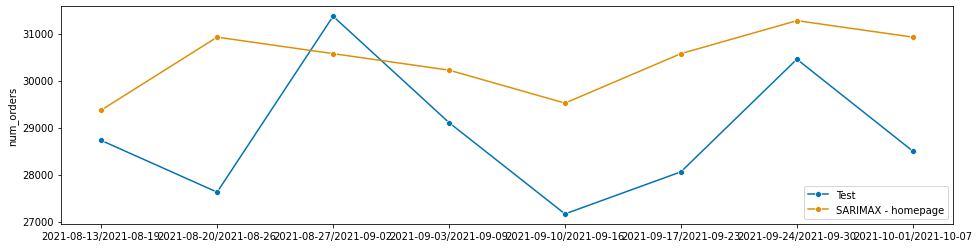

In [506]:
plot_series(
    y_test['num_orders'], 
    pd.DataFrame(sarimax_homepage_preds).set_index(y_test.index), 
    labels=['Test', 'SARIMAX - homepage']);

In [507]:
print('SARIMAX - weekly, homepage model RMSE: ', 
    mean_squared_error(y_test['num_orders'], sarimax_homepage_preds, squared=False))

SARIMAX - weekly, homepage model RMSE:  1986.8607711408797
